In [1]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from math import exp, factorial # funções matemáticas 'exp' e 'factorial'
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação de modelos de contagem
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP,ZeroInflatedPoisson
# pacote acima para a estimação dos modelos ZINB e ZIP, respectivamente
from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson
# pacote anterior para a realização do teste de Vuong
from scipy import stats # estatística chi2
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos

import warnings
warnings.filterwarnings('ignore')

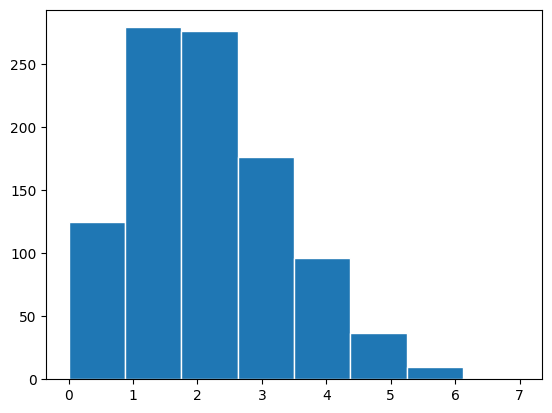

In [11]:
# Histograma da distribuição Poisson

pois = np.random.poisson(lam=2, size=1000)

plt.hist(pois, bins=8, edgecolor='white')
plt.show()

In [2]:
# Estabelecendo uma função da distribuição Poisson para determinados valores
# de lambda
def poisson_lambda(lmbda,m):
    return (exp(-lmbda) * lmbda ** m) / factorial(m)

In [3]:
# Plotagem da função definida para diferentes valores de lambda

m = np.arange(0,21)

lmbda_1 = []
lmbda_2 = []
lmbda_4 = []

for item in m:
    # Estabelecendo a distribuição com lambda = 1
    lmbda_1.append(poisson_lambda(1,item))
    # Estabelecendo a distribuição com lambda = 2
    lmbda_2.append(poisson_lambda(2,item))
    # Estabelecendo a distribuição com lambda = 4
    lmbda_4.append(poisson_lambda(4,item))

# Criando um dataframe com m variando de 0 a 20 e diferentes valores de lambda
df_lambda = pd.DataFrame({'m':m,
                          'lambda_1':lmbda_1,
                          'lambda_2':lmbda_2,
                          'lambda_4':lmbda_4})
df_lambda

,m,lambda_1,lambda_2,lambda_4
0,0,3.678794e-01,1.353353e-01,1.831564e-02
1,1,3.678794e-01,2.706706e-01,7.326256e-02
2,2,1.839397e-01,2.706706e-01,1.465251e-01
3,3,6.131324e-02,1.804470e-01,1.953668e-01
4,4,1.532831e-02,9.022352e-02,1.953668e-01
5,5,3.065662e-03,3.608941e-02,1.562935e-01
6,6,5.109437e-04,1.202980e-02,1.041956e-01
7,7,7.299195e-05,3.437087e-03,5.954036e-02
8,8,9.123994e-06,8.592716e-04,2.977018e-02
9,9,1.013777e-06,1.909493e-04,1.323119e-02


<function matplotlib.pyplot.show(close=None, block=None)>

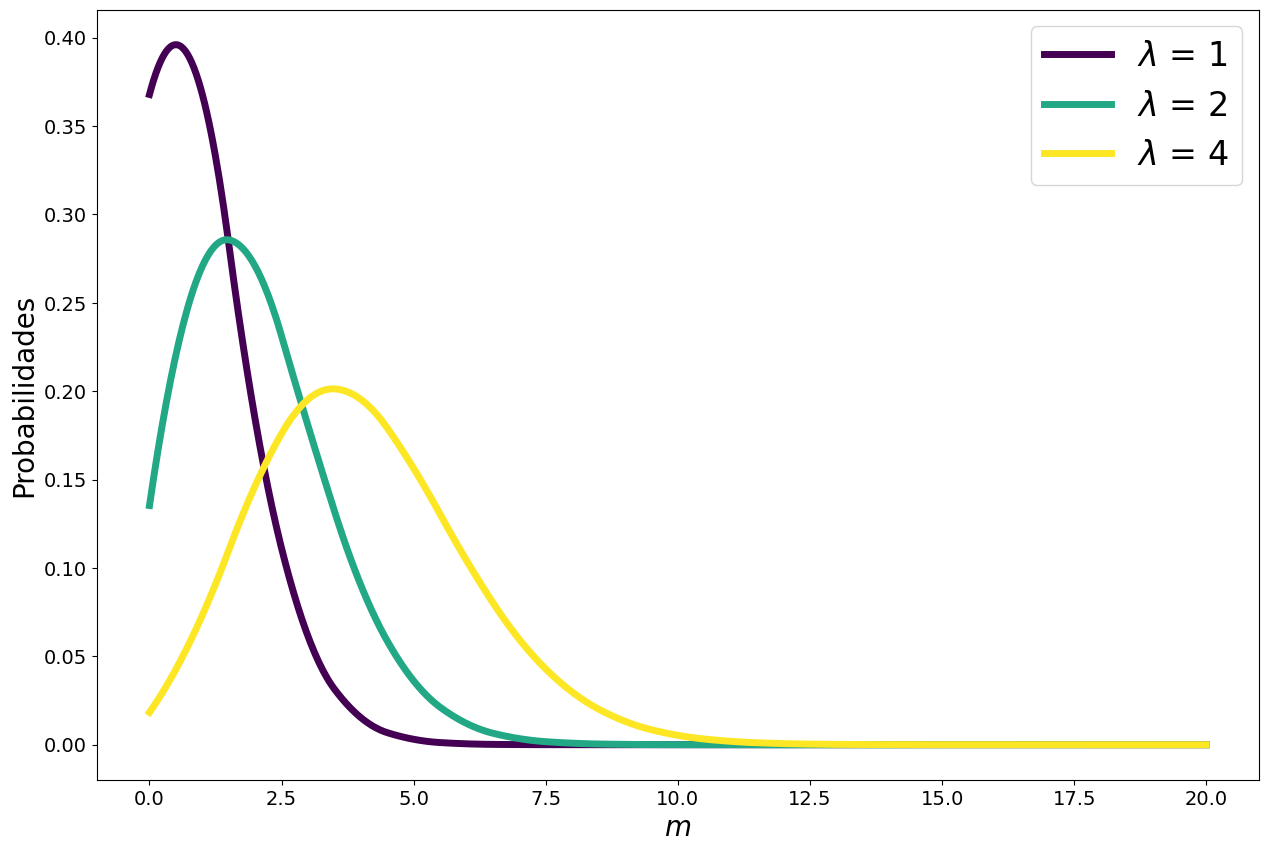

In [4]:
# Plotagem propriamente dita
from scipy.interpolate import interp1d

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, lambda_1 = smooth_line_plot(df_lambda.m, df_lambda.lambda_1)
x_new, lambda_2 = smooth_line_plot(df_lambda.m, df_lambda.lambda_2)
x_new, lambda_4 = smooth_line_plot(df_lambda.m, df_lambda.lambda_4)

plt.figure(figsize=(15,10))
plt.plot(x_new, lambda_1, linewidth=5, color='#440154FF')
plt.plot(x_new, lambda_2, linewidth=5, color='#22A884FF')
plt.plot(x_new, lambda_4, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20, style='italic')
plt.ylabel('Probabilidades', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([r'$\lambda$ = 1',r'$\lambda$ = 2',r'$\lambda$ = 4'], fontsize=24)
plt.show